In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading data
df = pd.read_csv('WhatsgoodlyData-6.csv')
df.head()

,Question,Segment Type,Segment Description,Answer,Count,Percentage
0,What social platform has influenced your onlin...,Mobile,Global results,Facebook,548,0.205
1,What social platform has influenced your onlin...,Mobile,Global results,Instagram,916,0.342
2,What social platform has influenced your onlin...,Mobile,Global results,Snapchat,86,0.032
3,What social platform has influenced your onlin...,Mobile,Global results,Twitter,179,0.067
4,What social platform has influenced your onlin...,Mobile,Global results,NaN,947,0.354


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Question             1450 non-null   object 
 1   Segment Type         1450 non-null   object 
 2   Segment Description  1450 non-null   object 
 3   Answer               1160 non-null   object 
 4   Count                1450 non-null   int64  
 5   Percentage           1450 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 68.1+ KB


In [4]:
#checking the null value
df.isna().sum()/len(df)

Question               0.0
Segment Type           0.0
Segment Description    0.0
Answer                 0.2
Count                  0.0
Percentage             0.0
dtype: float64

In [5]:
#fill null values
df['Answer'] = df['Answer'].fillna('Unknown')

In [6]:
df.isna().sum()/len(df)

Question               0.0
Segment Type           0.0
Segment Description    0.0
Answer                 0.0
Count                  0.0
Percentage             0.0
dtype: float64

In [7]:
df

,Question,Segment Type,Segment Description,Answer,Count,Percentage
0,What social platform has influenced your onlin...,Mobile,Global results,Facebook,548,0.205
1,What social platform has influenced your onlin...,Mobile,Global results,Instagram,916,0.342
2,What social platform has influenced your onlin...,Mobile,Global results,Snapchat,86,0.032
3,What social platform has influenced your onlin...,Mobile,Global results,Twitter,179,0.067
4,What social platform has influenced your onlin...,Mobile,Global results,Unknown,947,0.354
...,...,...,...,...,...,...
1445,What social platform has influenced your onlin...,Custom,Sexual orientation? Straight,Facebook,215,0.180
1446,What social platform has influenced your onlin...,Custom,Sexual orientation? Straight,Instagram,354,0.297
1447,What social platform has influenced your onlin...,Custom,Sexual orientation? Straight,Snapchat,44,0.037
1448,What social platform has influenced your onlin...,Custom,Sexual orientation? Straight,Twitter,88,0.074


# Analysis

### What is the overall percentage distribution of social platforms influencing online shopping for both mobile and web users?

In [8]:
#filter the data as per segment
df1 = df.copy()
df1[(df1['Segment Type'] == 'Mobile') | (df1['Segment Type'] == 'Web')]

,Question,Segment Type,Segment Description,Answer,Count,Percentage
0,What social platform has influenced your onlin...,Mobile,Global results,Facebook,548,0.205
1,What social platform has influenced your onlin...,Mobile,Global results,Instagram,916,0.342
2,What social platform has influenced your onlin...,Mobile,Global results,Snapchat,86,0.032
3,What social platform has influenced your onlin...,Mobile,Global results,Twitter,179,0.067
4,What social platform has influenced your onlin...,Mobile,Global results,Unknown,947,0.354
5,What social platform has influenced your onlin...,Web,Web,Facebook,0,0.000
6,What social platform has influenced your onlin...,Web,Web,Instagram,0,0.000
7,What social platform has influenced your onlin...,Web,Web,Snapchat,0,0.000
8,What social platform has influenced your onlin...,Web,Web,Twitter,0,0.000
9,What social platform has influenced your onlin...,Web,Web,Unknown,2,1.000


In [9]:
#sum the counts
df1 = df1.groupby('Answer')['Count'].sum().reset_index()

In [10]:
df1['total'] = df1['Count'].sum()

In [11]:
#calculating percentage distribution
df1['social_per_dist'] = round(df1['Count']/df1['total']*100,2)

In [12]:
df1

,Answer,Count,total,social_per_dist
0,Facebook,10329,50770,20.34
1,Instagram,16524,50770,32.55
2,Snapchat,1574,50770,3.10
3,Twitter,3407,50770,6.71
4,Unknown,18936,50770,37.30


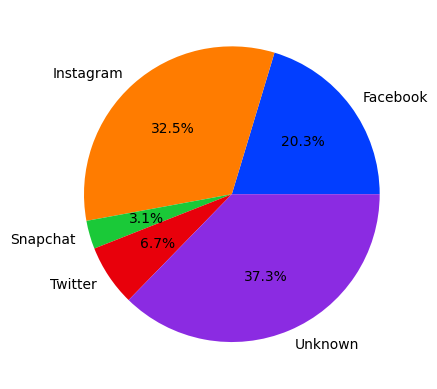

In [13]:
# define Seaborn color palette to use 
palette_color = sns.color_palette('bright') 
  
# plotting data on chart 
plt.pie(df1['social_per_dist'], labels=df1['Answer'], colors=palette_color, autopct='%.01f%%') 
  
# displaying chart 
plt.show()

### Which social platform has the highest influence on online shopping overall?

In [14]:
df2 = df.copy()

In [15]:
#sum the count based on social platforms
new_data = df.groupby('Answer')['Count'].sum().reset_index()

In [16]:
#sort the values in ascending order
new_data.sort_values(by='Count', ascending=False)

,Answer,Count
4,Unknown,18936
1,Instagram,16524
0,Facebook,10329
3,Twitter,3407
2,Snapchat,1574


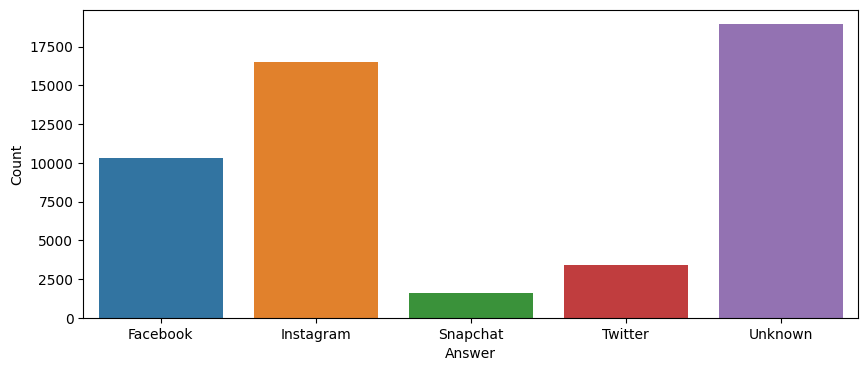

In [17]:
#plot the bar chart 
plt.figure(figsize=(10,4))
sns.barplot(new_data, x='Answer', y='Count', hue='Answer', legend=False)
plt.show()

### How does the influence of social platforms differ between mobile and web users?

In [18]:
df3 = df.copy()

In [19]:
##total count by segment
users_shoppers = df3.groupby('Segment Type')['Count'].sum().reset_index()

In [20]:
users_shoppers

,Segment Type,Count
0,Custom,43241
1,Gender,2676
2,Mobile,2676
3,University,2175
4,Web,2


People who go for online shopping using mobile = 2676
& People who go for online shopping using web = 2

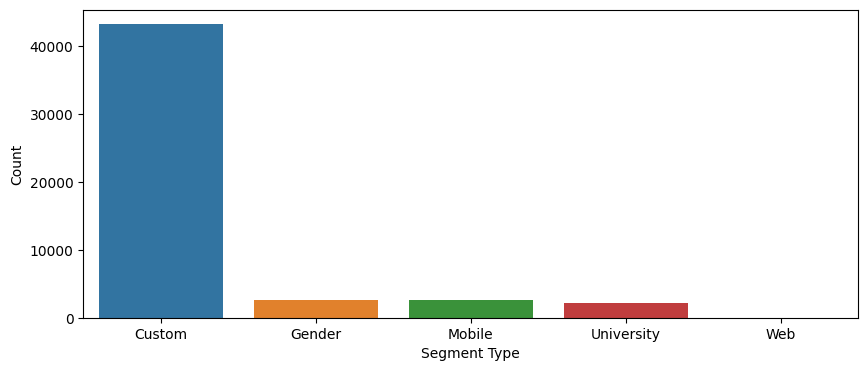

In [21]:
plt.figure(figsize=(10,4))
sns.barplot(users_shoppers, x='Segment Type', y='Count', hue='Segment Type', legend=False)
plt.show()

### What is the distribution of social platform influence among female and male voters?

In [22]:
df4 = df.copy()

#filter the data according to gender
df4 = df4[(df4['Segment Type'] == 'Gender')]

In [23]:
#total count for genders
gender_data = df4.groupby(['Segment Description', 'Answer'])['Count'].sum().reset_index()

In [24]:
gen = gender_data.groupby('Segment Description')['Count'].sum().reset_index()

In [25]:
#rename the column name
gen.rename(columns={'Count':'gender_total'}, inplace=True)

In [26]:
gen

,Segment Description,gender_total
0,Female voters,1114
1,Male voters,1562


In [27]:
#join the both dataframes 
final_data = gender_data.merge(gen, how='inner', on = 'Segment Description')

In [28]:
#calculating the percentage distribution
final_data['distribution'] = round(final_data['Count']/final_data['gender_total']*100,2)

In [29]:
final_data

,Segment Description,Answer,Count,gender_total,distribution
0,Female voters,Facebook,222,1114,19.93
1,Female voters,Instagram,535,1114,48.03
2,Female voters,Snapchat,29,1114,2.60
3,Female voters,Twitter,57,1114,5.12
4,Female voters,Unknown,271,1114,24.33
5,Male voters,Facebook,326,1562,20.87
6,Male voters,Instagram,380,1562,24.33
7,Male voters,Snapchat,56,1562,3.59
8,Male voters,Twitter,122,1562,7.81
9,Male voters,Unknown,678,1562,43.41


In the case of Females, Instgram has influenced a lot(48%). However, in the case of Man, the highest influence came from the Unknown channel(43%).

<Axes: xlabel='Answer', ylabel='Count'>

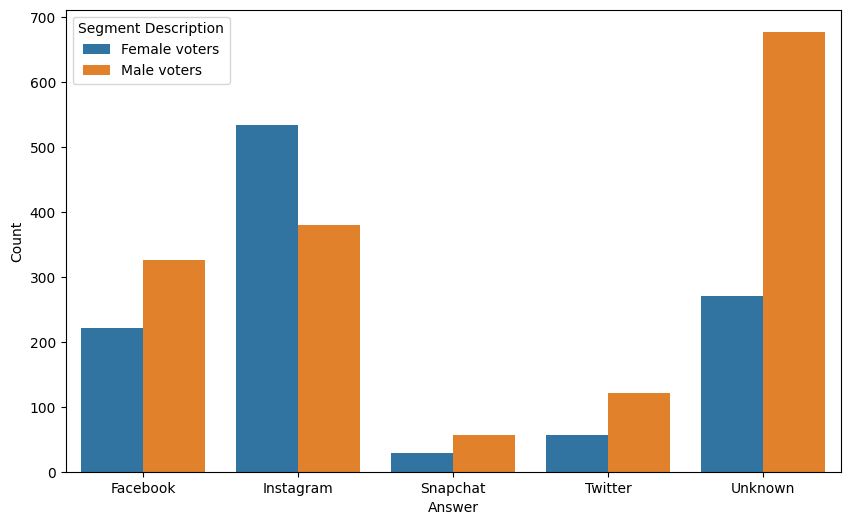

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(final_data, x='Answer', y='Count', hue='Segment Description', legend=True)

### Among female voters, which social platform has the highest influence on online shopping?

Instagram with a total distribution of 48.03%

### Among male voters, which social platform has the highest influence on online shopping?

Unknown platform with a total distribution of 43.41%

### How does the influence of social platforms vary among different universities?

In [31]:
df5 = df.copy()

#filter the data based on university and clean the data
df5[df5['Segment Type']=='University'].reset_index()
df5 = df5[df5['Segment Description'].str.contains('University')]

In [32]:
#total count of users
final_uni_data = df5.groupby(['Segment Description'])['Count'].sum().reset_index()

In [33]:
final_uni_data.sort_values(by='Count', ascending=False)

,Segment Description,Count
123,University of Virginia,256
59,San Diego State University,169
17,Cornell University,122
49,Northwestern University,115
127,University of Wisconsin-Madison,103
...,...,...
30,Indiana University-Purdue University Indianapolis,1
81,University of California Riverside,1
32,James Madison University,1
34,Kansas State University,1


### Is there a significant difference in social platform influence between genders?

In [34]:
df6 = df.copy()

In [35]:
#filter to prepare the data for the test
df6 = df6[df6['Segment Type'] == 'Gender']
df6 = df6[['Segment Description', 'Answer', 'Count']]

In [36]:
#create pivot table to make group
new_df = pd.pivot_table(df6, values = 'Count', index=['Answer'], columns=['Segment Description'])
new_df

Segment Description,Female voters,Male voters
Answer,,
Facebook,222.0,326.0
Instagram,535.0,380.0
Snapchat,29.0,56.0
Twitter,57.0,122.0
Unknown,271.0,678.0


In [37]:
#import library
from scipy import stats

#### Hypothesis:

##### Null Hypothesis: There is no difference in social platform influence between gender
##### Alternate Hypothesis: There is a significant difference in social platform influence between gender
##### significance level alpha = 0.05

In [38]:
#calculate t statistics and p_value
t_stat, p_value = stats.ttest_ind(new_df['Female voters'], new_df['Male voters'])

In [39]:
t_stat, p_value

(-0.6294488204887816, 0.5466061955905805)

#### Here, the p_value is 0.5466 which is greater than 0.05. In this case, we do not have significant results to reject the null hypothesis. Hence, there is no difference in social platform influence between genders. 

### Is there a significant difference in social platform influence between different universities?

In [40]:
#creating pivot table
uni_data = pd.pivot_table(df5, values='Count', index=['Answer'], columns=['Segment Description'])
uni_data

Segment Description,Appalachian State University,Arkansas Tech University,Auburn University,Azusa Pacific University,Baylor University,Binghamtom University,Boise State University,Boston University,Brock University,Butler University,...,University of Wisconsin-Madison,University of Wisconsin-Whitewater,Vanderbilt University,Villanova University,Wake Forest University,Washington State University,Wesleyan University,West Virginia University,Whatsgoodly University,Wilfred Laurier University
Answer,,,,,,,,,,,,,,,,,,,,,
Facebook,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,26.0,0.0,15.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0
Instagram,9.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,13.0,...,35.0,0.0,11.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0
Snapchat,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Twitter,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Unknown,12.0,1.0,4.0,0.0,1.0,1.0,0.0,0.0,0.0,6.0,...,34.0,0.0,13.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


#### Hypothesis:

##### Null Hypothesis: There is no difference in social platform influence between different universities
##### Alternate Hypothesis: There is difference in social platform influence between different universities
##### significance level alpha = 0.05

In [41]:
# Perform ANOVA test
f_statistic, p_value = stats.f_oneway(*[uni_data[col] for col in uni_data.columns])

print("F Statistic:", f_statistic)
print("P-value:", p_value)

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences in social platform influence between universities.")
else:
    print("Fail to reject the null hypothesis. There are no significant differences in social platform influence between universities.")

F Statistic: 6.680458811805088
P-value: 1.3304237992358585e-58
Reject the null hypothesis. There are significant differences in social platform influence between universities.
